In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


       DR_NO   Date Rptd    DATE OCC  TIME OCC    AREA NAME  \
0  220314085  2022-07-22  2020-05-12      1110    Southwest   
1  222013040  2022-08-06  2020-06-04      1620      Olympic   
2  220614831  2022-08-18  2020-08-17      1200    Hollywood   
3  231207725  2023-02-27  2020-01-27       635  77th Street   
4  220213256  2022-07-14  2020-07-14       900      Rampart   

         Crm Cd Desc  Vict Age Vict Sex Vict Descent Weapon Desc  Status Desc  \
0  THEFT OF IDENTITY        27        F            B         NaN  Invest Cont   
1  THEFT OF IDENTITY        60        M            H         NaN  Invest Cont   
2  THEFT OF IDENTITY        28        M            H         NaN  Invest Cont   
3  THEFT OF IDENTITY        37        M            H         NaN  Invest Cont   
4  THEFT OF IDENTITY        79        M            B         NaN  Invest Cont   

                                  LOCATION  
0  2500 S  SYCAMORE                     AV  
1  3300    SAN MARINO                   ST  

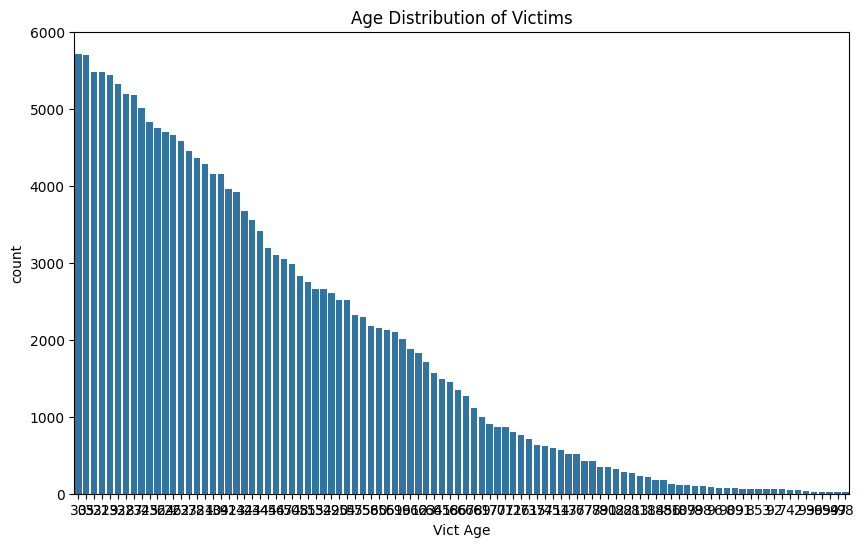

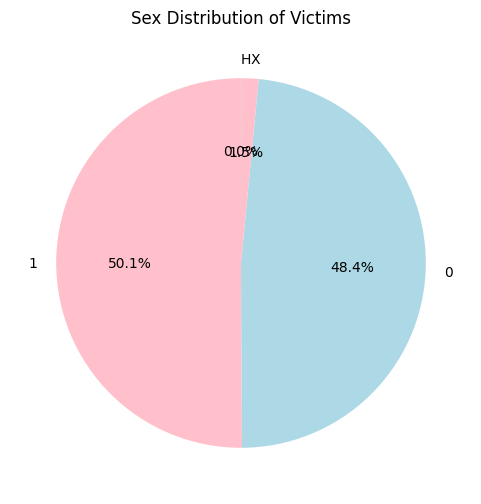

      AREA NAME  Case Count   Rating
0       Central       14944  Extreme
1     Southwest       11945  Extreme
2   77th Street       11739  Extreme
3       Pacific        9923     High
4     Hollywood        9762     High
5     Southeast        9571     High
6       Olympic        9414     High
7        Newton        9152     High
8      Van Nuys        8621     High
9   N Hollywood        8502     High
10     Wilshire        8482     High
11      Topanga        8478     High
12      Rampart        8346     High
13  West Valley        8102     High
14      West LA        7911     High
15    Northeast        7628     High
16   Devonshire        7411     High
17      Mission        6990     High
18       Harbor        6618     High
19   Hollenbeck        6193     High
20     Foothill        5983     High
      AREA NAME  Case Count   Rating
0       Central       14944  Extreme
1     Southwest       11945  Extreme
2   77th Street       11739  Extreme
3       Pacific        9923     High
4

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import os
from scipy.sparse import coo_matrix

# Load Dataset
train_data = pd.read_csv(r"C:\Users\USER\Downloads\crimes.csv")

# Data Exploration
print(train_data.head())
print(train_data.shape)
print(train_data.isnull().sum())

# Data Cleaning
train_data["Vict Sex"] = train_data["Vict Sex"].replace({"F": 0, "M": 1})
train_data["Weapon Desc"] = pd.to_numeric(train_data["Weapon Desc"], errors='coerce').fillna(1).astype(int)
train_data["Vict Sex"] = train_data["Vict Sex"].fillna(0)
train_data.drop("Vict Descent", axis=1, inplace=True)

# Data Analysis
most_common_age = train_data['Vict Age'].value_counts().idxmax()
most_common_sex = train_data['Vict Sex'].value_counts().idxmax()
print(f"Most common age: {most_common_age}, Most common sex: {most_common_sex}")

train_data['Date Rptd'] = pd.to_datetime(train_data['Date Rptd'], errors='coerce')
train_data['date'] = train_data['Date Rptd'].dt.date
most_common_date = train_data['date'].value_counts().idxmax()
print(f"Most common time: {most_common_date}")

# Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Vict Age', data=train_data, order=train_data['Vict Age'].value_counts().index)
plt.title("Age Distribution of Victims")
plt.show()

plt.figure(figsize=(6, 6))
train_data['Vict Sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['pink', 'lightblue'])
plt.title("Sex Distribution of Victims")
plt.ylabel('')
plt.show()

# Crime Area Analysis
grouped_areas = train_data['AREA NAME'].value_counts().reset_index()
grouped_areas.columns = ['AREA NAME', 'Case Count']
sorted_areas = grouped_areas.sort_values(by='Case Count', ascending=False)

def assign_rating(count):
    if count > 10000:
        return "Extreme"
    elif count > 5000:
        return "High"
    elif count > 2000:
        return "Moderate"
    else:
        return "Low"

sorted_areas['Rating'] = sorted_areas['Case Count'].apply(assign_rating)
print(sorted_areas)

# Create Risk Map Data
data = {
    'AREA NAME': ['Central', 'Southwest', '77th Street', 'Pacific', 'Hollywood', 'Southeast',
                  'Olympic', 'Newton', 'Van Nuys', 'N Hollywood', 'Wilshire', 'Topanga',
                  'Rampart', 'West Valley', 'West LA', 'Northeast', 'Devonshire', 'Mission',
                  'Harbor', 'Hollenbeck', 'Foothill'],
    'Case Count': [14944, 11945, 11739, 9923, 9762, 9571, 9414, 9152, 8621, 8502, 8482, 8478,
                   8346, 8102, 7911, 7628, 7411, 6990, 6618, 6193, 5983],
    'Rating': ['Extreme', 'Extreme', 'Extreme', 'High', 'High', 'High', 'High', 'High', 'High',
               'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 
               'High', 'High']
}
df = pd.DataFrame(data)
print(df)
